<a href="https://colab.research.google.com/github/JSK-Sowmith/DataScienceProjects/blob/main/Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
file_id = '1gMW39qW6mHc3XKTG_qKrcrR3_UAfLdFl'
url = f'https://drive.google.com/uc?id={file_id}'

#https://drive.google.com/file/d/1gMW39qW6mHc3XKTG_qKrcrR3_UAfLdFl/view?usp=sharing


In [ ]:
df = pd.read_csv(url)
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


In [ ]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [ ]:
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
df.apply(lambda col: col.astype(str).str.lower().isin(['null','nan', 'Nan', 'Unknown', 'unknown']).any())

,0
User_ID,False
Product_ID,False
Gender,False
Age,False
Occupation,False
City_Category,False
Stay_In_Current_City_Years,False
Marital_Status,False
Product_Category,False
Purchase,False


In [ ]:
df['Gender'].value_counts(normalize=True)*100

,proportion
Gender,
M,75.310507
F,24.689493


In [ ]:
df['Marital_Status'].value_counts(normalize=True)*100

,proportion
Marital_Status,
0,59.034701
1,40.965299


In [ ]:
df.groupby('Gender')['User_ID'].nunique()

,User_ID
Gender,
F,1666
M,4225


In [ ]:
df_male = df[df['Gender']=='M']

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
np.mean(df_male['Purchase']).round(2)

np.float64(9437.53)

In [ ]:
np.std(df_male['Purchase'])

5092.180063635943

In [ ]:
df_female = df[df['Gender']=='F']
np.mean(df_female['Purchase']).round(2)

np.float64(8734.57)

In [ ]:
np.std(df_female['Purchase'])

4767.215738016988

In [ ]:
np.mean(df['Purchase']).round(2)

np.float64(9263.97)

In [ ]:
np.std(df['Purchase'])

5023.060827959972

<Axes: xlabel='Purchase', ylabel='Count'>

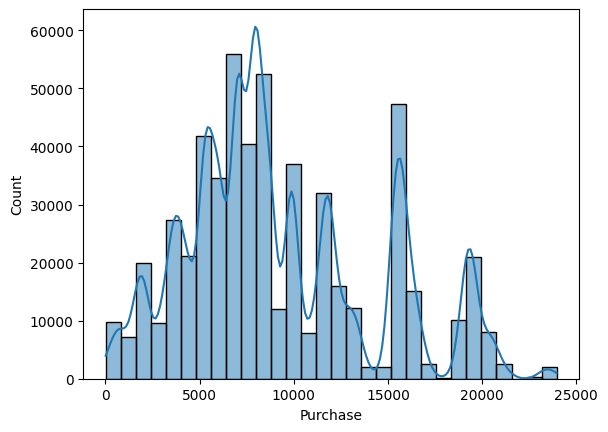

In [ ]:
import seaborn as sns

sns.histplot(df['Purchase'], bins=30, kde=True)

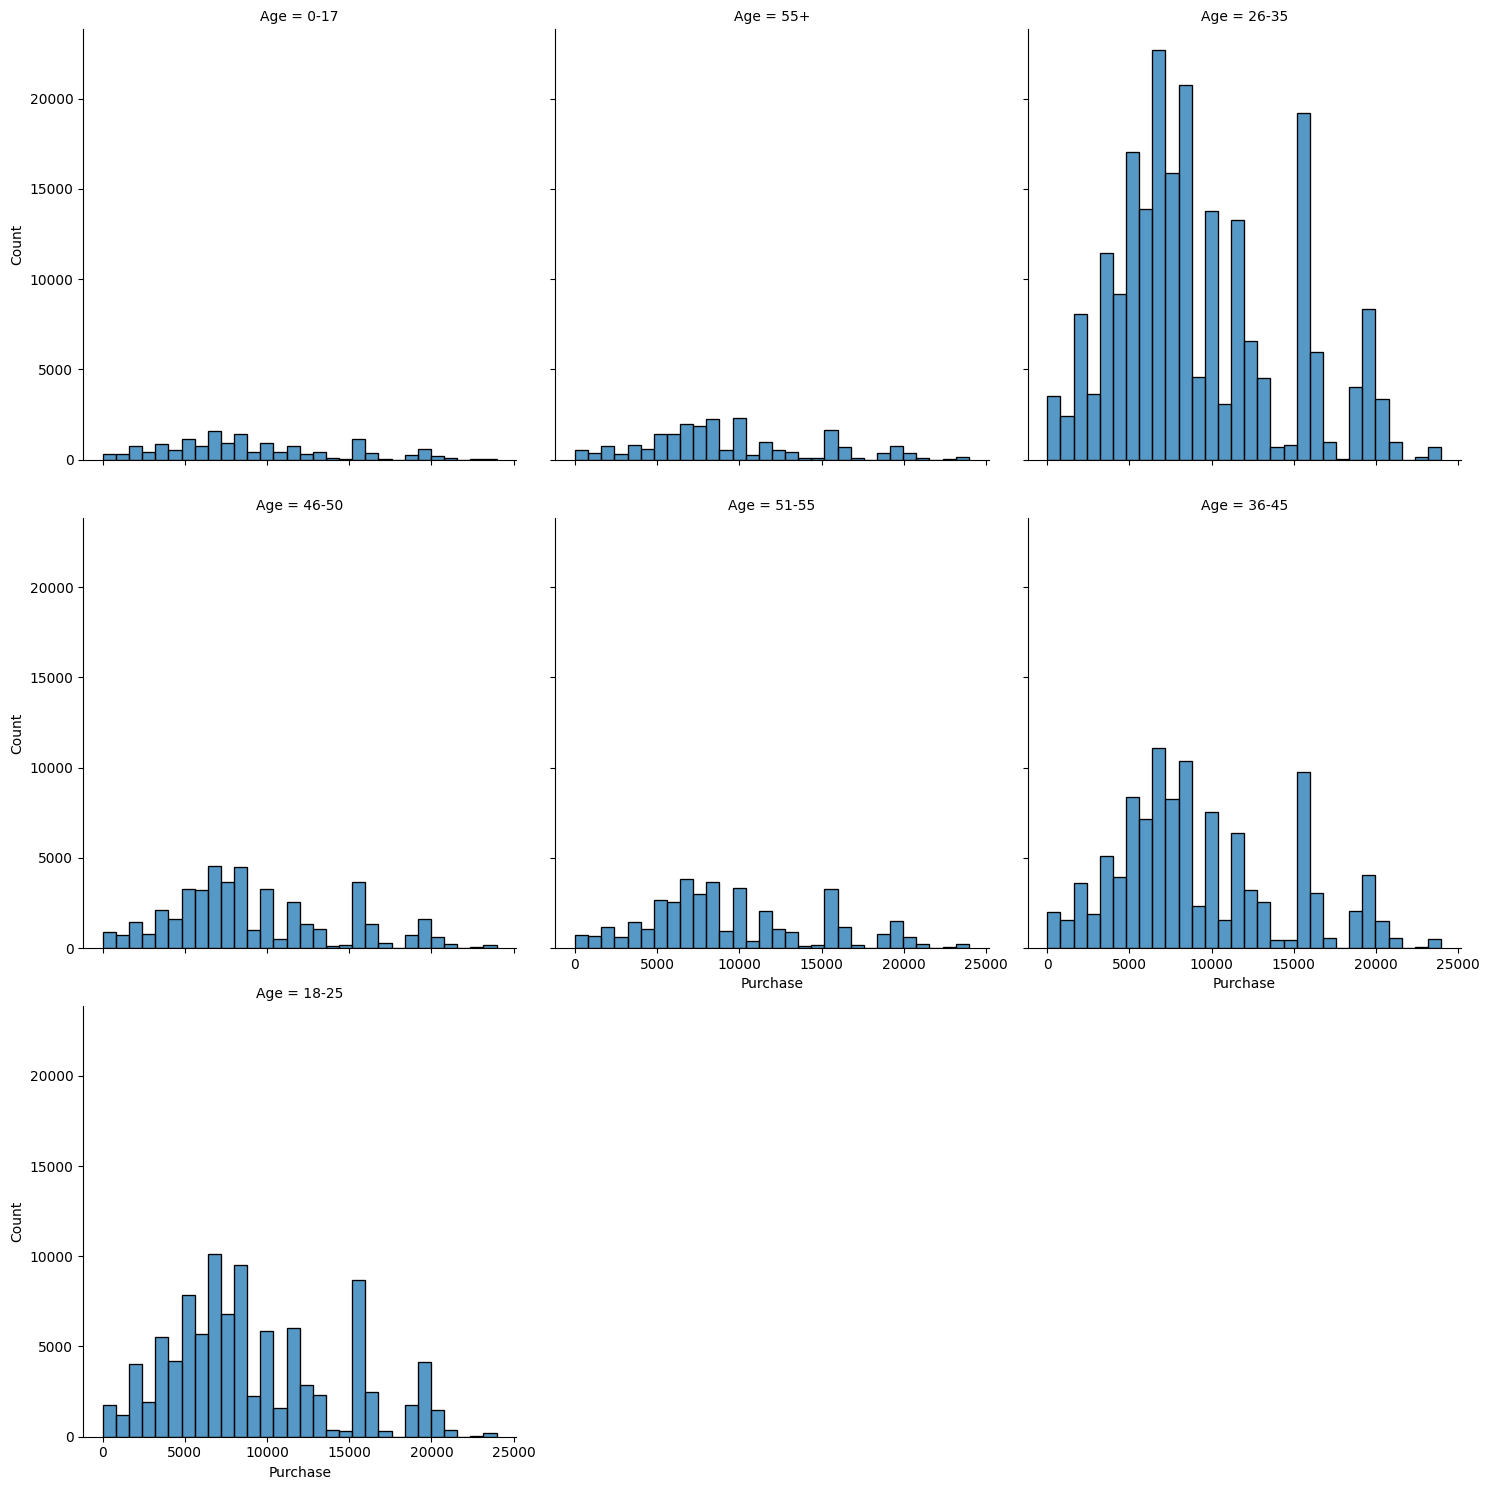

In [ ]:
sns.displot(data=df, x='Purchase', col='Age', col_wrap=3, bins=30)

<Axes: xlabel='Gender', ylabel='Purchase'>

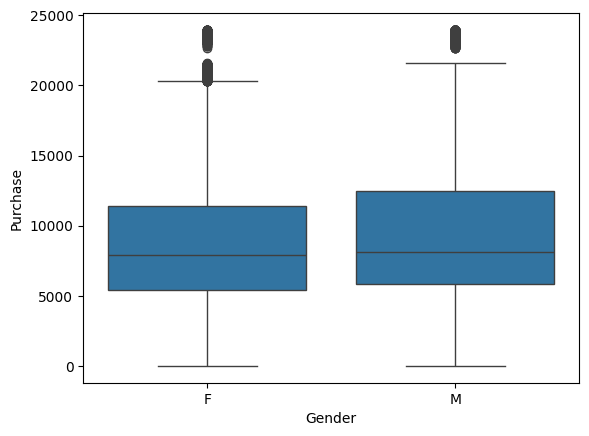

In [ ]:
sns.boxplot(x=df['Gender'], y=df['Purchase'])

<Axes: xlabel='Age', ylabel='Purchase'>

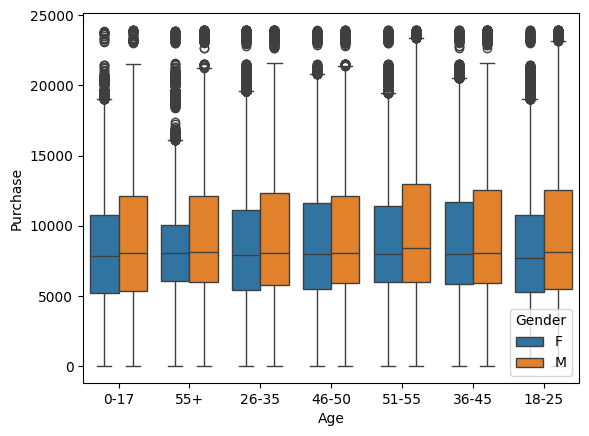

In [ ]:
sns.boxplot(x=df['Age'], y=df['Purchase'], hue=df['Gender'])

<Axes: xlabel='Product_Category', ylabel='Purchase'>

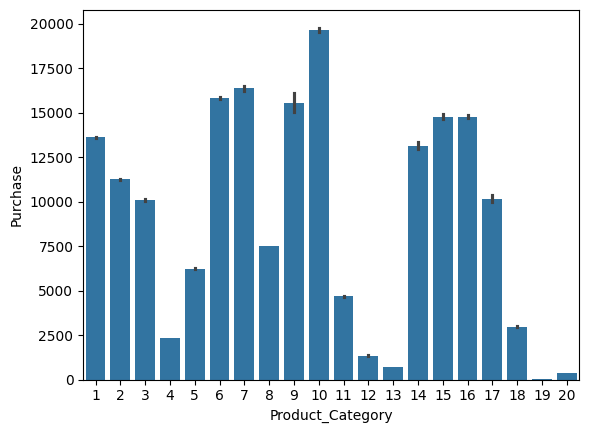

In [ ]:
sns.barplot(x='Product_Category', y='Purchase', data=df)

<Axes: xlabel='Product_Category', ylabel='Purchase'>

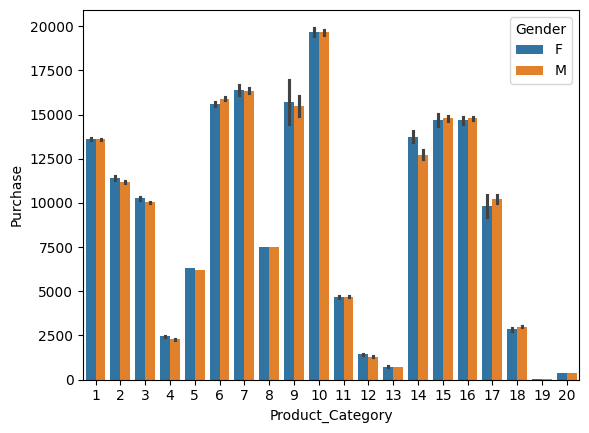

In [ ]:
sns.barplot(x='Product_Category', y='Purchase', data=df, hue='Gender')

In [ ]:
summary = df.groupby(['Age', 'Product_Category'])['Purchase'].sum().reset_index()
summary

,Age,Product_Category,Purchase
0,0-17,1,48783247
1,0-17,2,8735846
2,0-17,3,11317806
3,0-17,4,1701452
4,0-17,5,27059712
...,...,...,...
135,55+,16,5764378
136,55+,17,710254
137,55+,18,721506
138,55+,19,4006


In [ ]:
top_per_age = summary.sort_values('Purchase', ascending=False).groupby('Age').first().reset_index()
top_per_age

,Age,Product_Category,Purchase
0,0-17,1,48783247
1,18-25,1,362607972
2,26-35,1,783813459
3,36-45,1,380631904
4,46-50,1,144311800
5,51-55,1,127824120
6,55+,1,62041252


In [ ]:
summary.sort_values('Purchase', ascending=True).groupby('Age').first().reset_index()

,Age,Product_Category,Purchase
0,0-17,19,2271
1,18-25,19,9913
2,26-35,19,20739
3,36-45,19,11848
4,46-50,19,5521
5,51-55,19,5080
6,55+,19,4006


<Axes: >

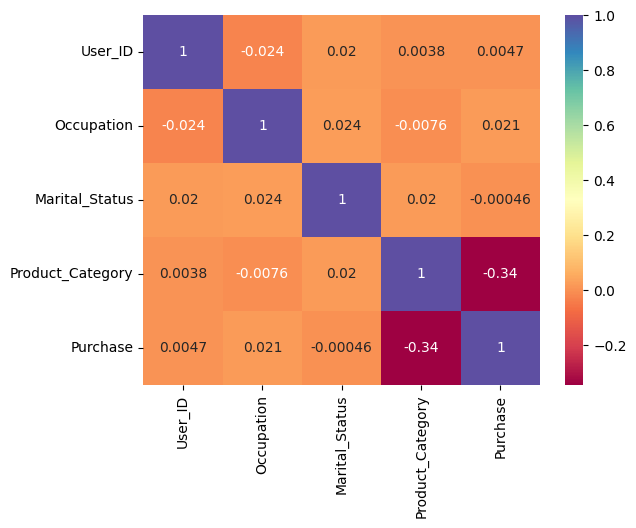

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Spectral')

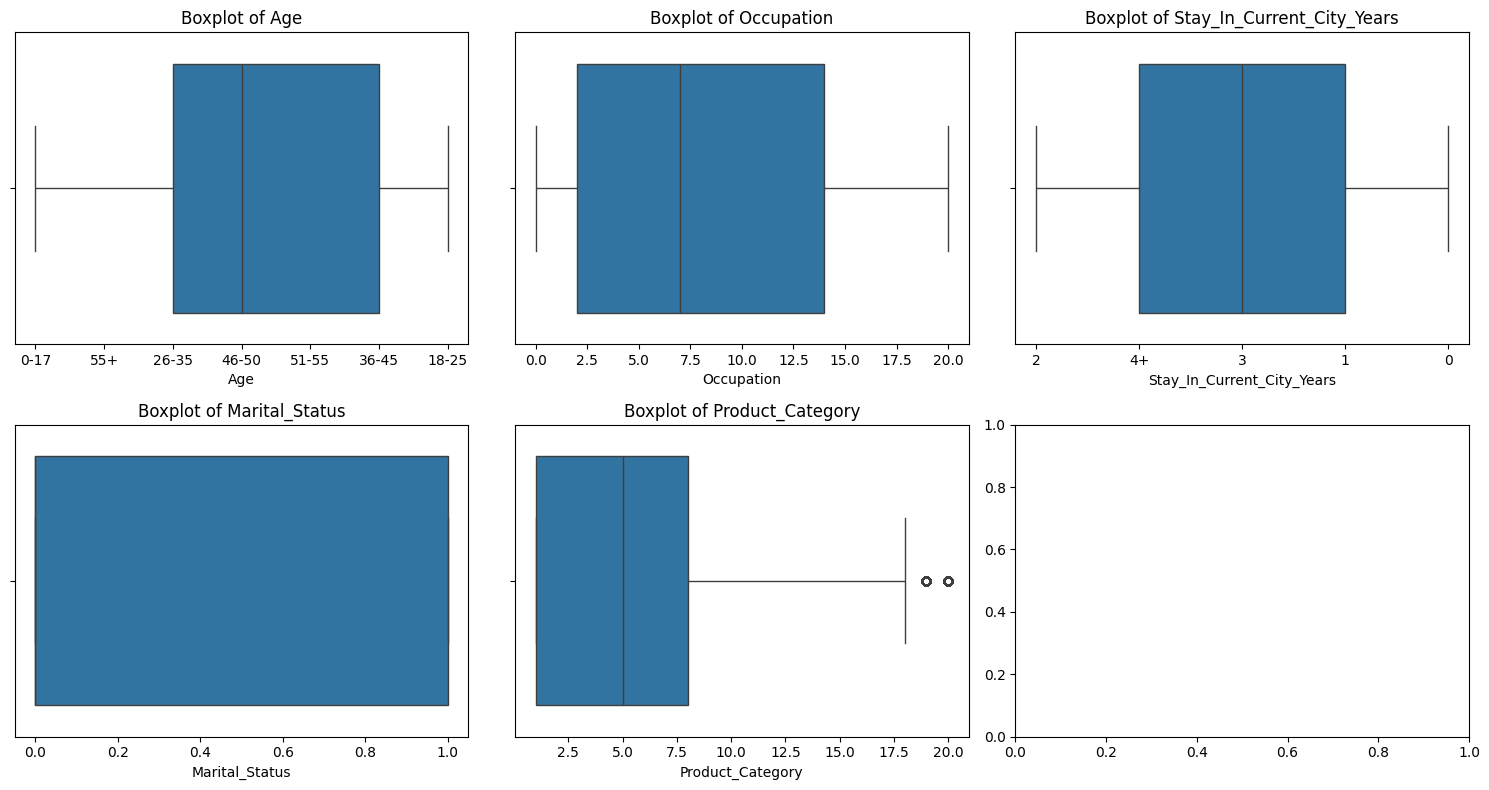

In [ ]:
cols = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
rows = 2
columns = 3
fig, axes = plt.subplots(rows, columns, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

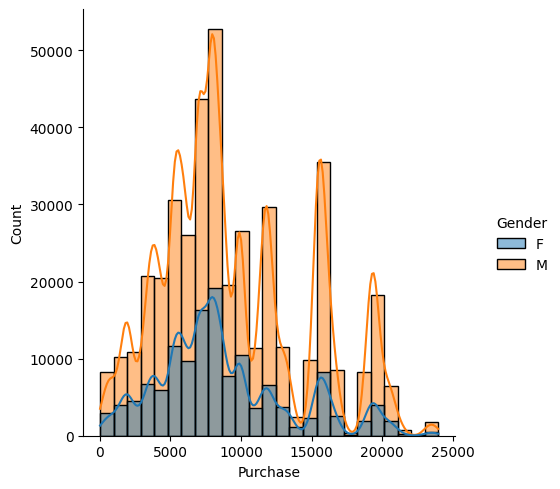

In [ ]:
sns.displot(x=df['Purchase'], hue=df['Gender'], bins=25,kde=True)

In [ ]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [ ]:
df.groupby('Product_Category')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
1,140378.0,13606.218596,4298.834894,3790.0,11546.00,15245.0,15812.00,19708.0
2,23864.0,11251.935384,3570.642713,3176.0,9645.75,12728.5,13212.00,16504.0
3,20213.0,10096.705734,2824.626957,2638.0,8198.00,10742.0,13211.00,13717.0
4,11753.0,2329.659491,812.540292,684.0,2058.00,2175.0,2837.00,3556.0
5,150933.0,6240.088178,1909.091687,1713.0,5242.00,6912.0,7156.00,8907.0
6,20466.0,15838.478550,4011.233690,3981.0,12505.00,16312.0,20051.00,20690.0
7,3721.0,16365.689600,4174.554105,4061.0,12848.00,16700.0,20486.00,21080.0
8,113925.0,7498.958078,2013.015062,1939.0,6036.00,7905.0,9722.00,10082.0
9,410.0,15537.375610,5330.847116,4528.0,13583.50,14388.5,18764.00,23531.0


In [ ]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,74398.0,9180.075123,4990.479940,12.0,5480.0,8025.0,11990.0,23960.0
1,193821.0,9250.145923,5027.476933,12.0,5500.0,8041.0,12042.0,23961.0
2,101838.0,9320.429810,5044.588224,12.0,5846.0,8072.0,12117.0,23961.0
3,95285.0,9286.904119,5020.343541,12.0,5832.0,8047.0,12075.0,23961.0
4+,84726.0,9275.598872,5017.627594,12.0,5844.0,8052.0,12038.0,23958.0


In [ ]:
df.groupby('Occupation')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
0,69638.0,9124.428588,4971.757402,12.0,5445.00,8001.0,11957.00,23961.0
1,47426.0,8953.193270,4838.482159,12.0,5825.00,7966.0,11702.75,23960.0
2,26588.0,8952.481683,4939.418663,12.0,5419.00,7952.0,11718.00,23955.0
3,17650.0,9178.593088,5000.942719,12.0,5478.00,8008.0,11961.00,23914.0
4,72308.0,9213.980251,5043.674855,12.0,5441.75,8043.0,12034.00,23961.0
5,12177.0,9333.149298,5025.616603,12.0,5452.00,8080.0,12091.00,23924.0
6,20355.0,9256.535691,4989.216005,12.0,5888.00,8050.0,11971.50,23951.0
7,59133.0,9425.728223,5086.097089,12.0,5878.00,8069.0,12486.00,23948.0
8,1546.0,9532.592497,4916.641374,14.0,5961.75,8419.5,12607.00,23869.0


In [ ]:
df['Purchase'].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


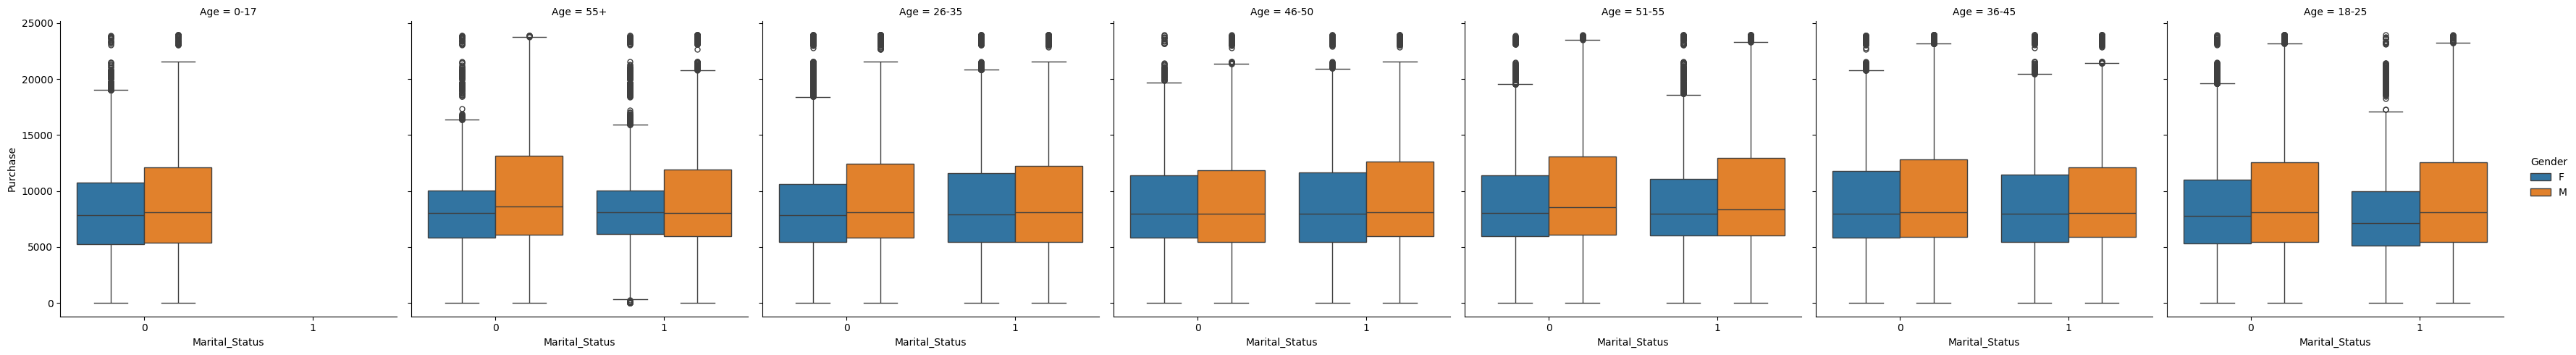

In [ ]:
sns.catplot(x=df['Marital_Status'], y=df['Purchase'], hue=df['Gender'], col=df['Age'], kind='box')

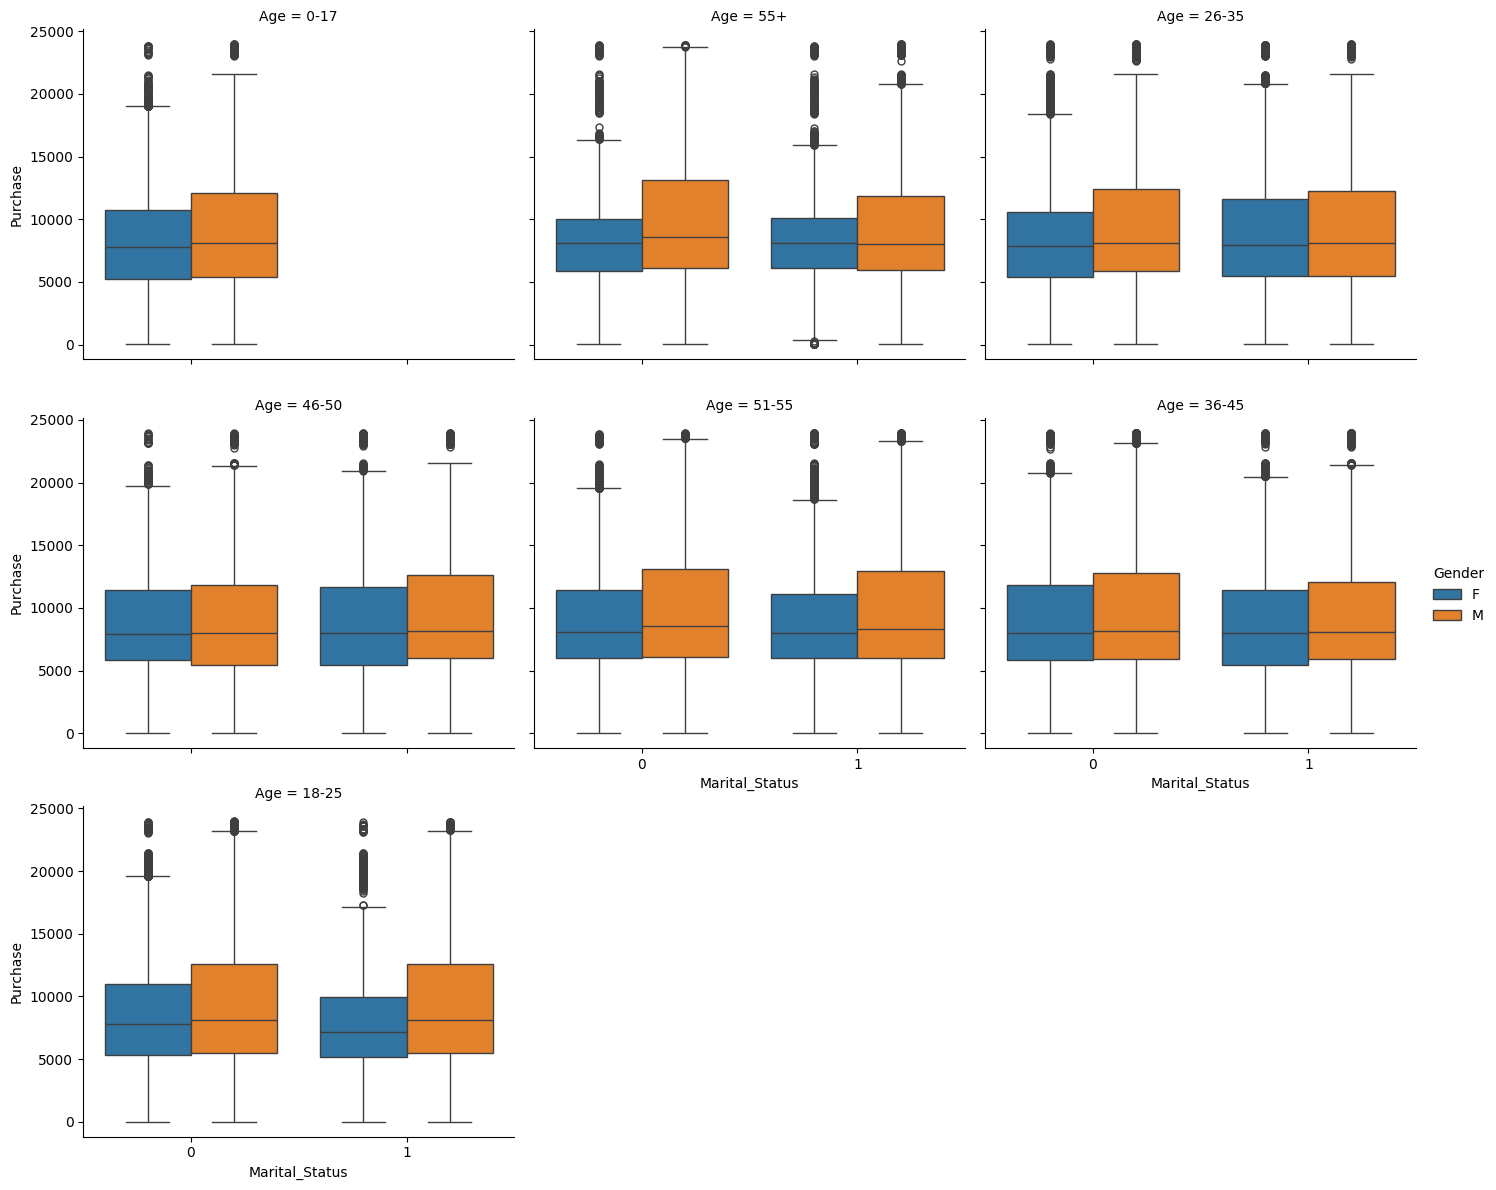

In [ ]:
sns.catplot(
    x='Marital_Status',
    y='Purchase',
    hue='Gender',
    col='Age',
    kind='box',
    col_wrap=3,
    height=4,
    aspect=1.2,
    data=df
)

<Axes: xlabel='City_Category', ylabel='Purchase'>

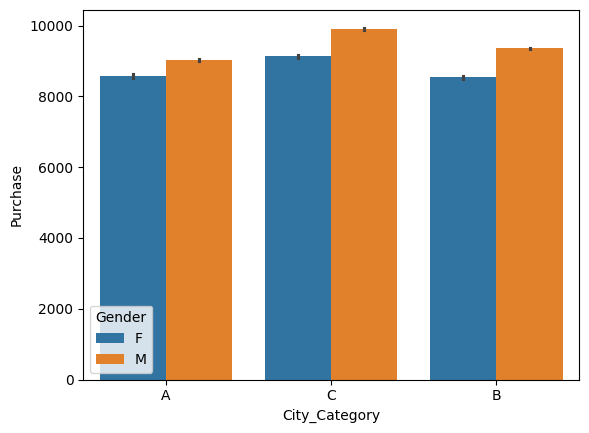

In [ ]:
sns.barplot(data=df, x='City_Category', y='Purchase', hue='Gender')

<Axes: xlabel='City_Category', ylabel='Purchase'>

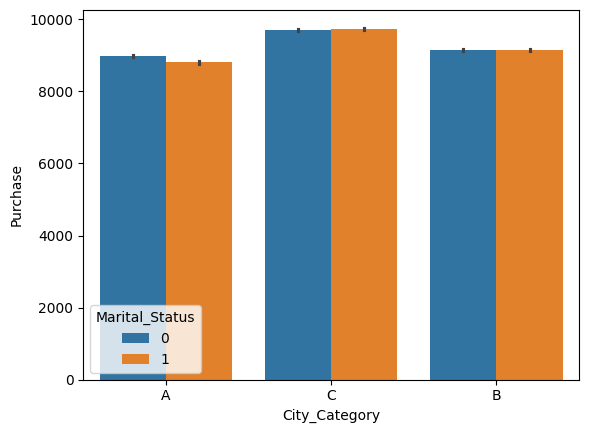

In [ ]:
sns.barplot(data=df, x='City_Category', y='Purchase', hue='Marital_Status')

In [ ]:
df['City_Category'].value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


In [ ]:
df.groupby('City_Category')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


In [ ]:
#sns.countplot(x=df['Purchase'], hue=df['City_Category'])

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

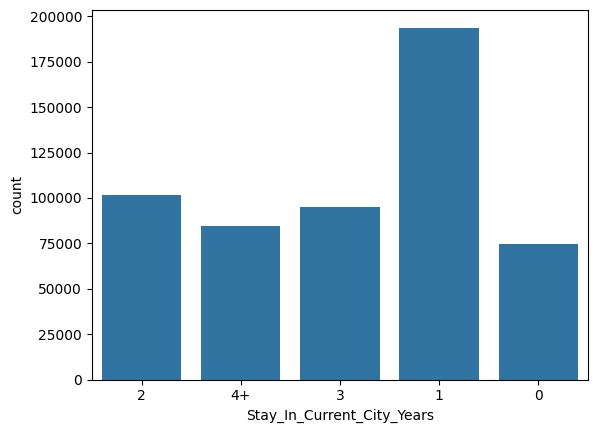

In [ ]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

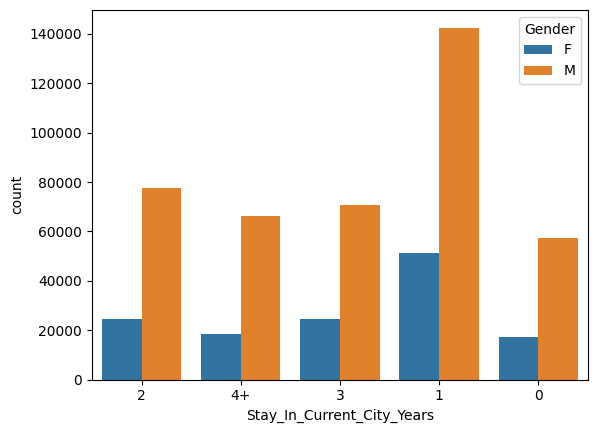

In [ ]:
sns.countplot(x=df['Stay_In_Current_City_Years'], hue=df['Gender'])

In [ ]:
sample_size = 50
iterations = 1000
male_purchases = []
for i in range(iterations):
  male_purchases.append(df_male.sample(sample_size)['Purchase'].mean())

9444.8906


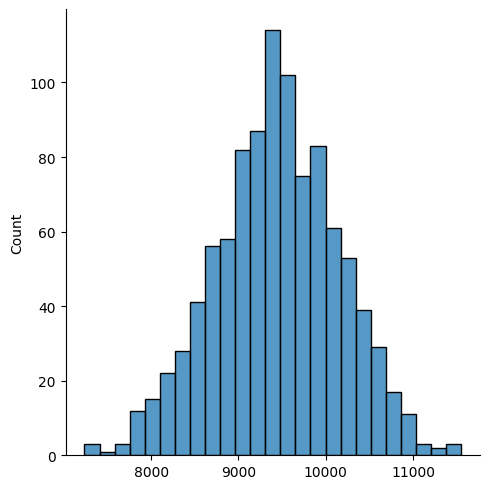

In [ ]:
print(np.mean(male_purchases))
sns.displot(x=male_purchases, bins=25)

8731.7947


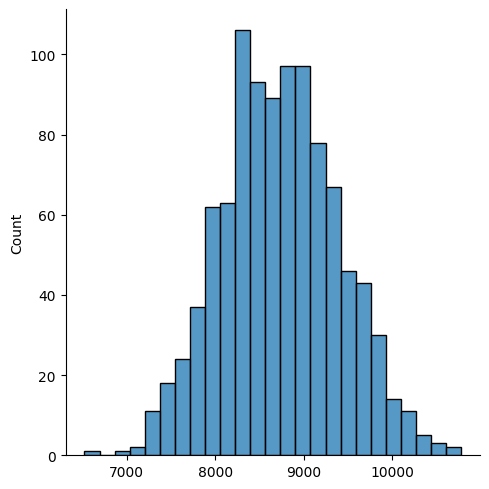

In [ ]:
female_purchases = []
for i in range(iterations):
  female_purchases.append(df_female.sample(sample_size)['Purchase'].mean())
print(np.mean(female_purchases))
sns.displot(x=female_purchases, bins=25)

In [ ]:
len(df_male)

414259

In [ ]:
(df_male['Purchase']).sum()/len(df_male)

np.float64(9437.526040472265)

In [ ]:
(df_female['Purchase']).sum()/len(df_female)

np.float64(8734.565765155476)

<Axes: xlabel='Age', ylabel='count'>

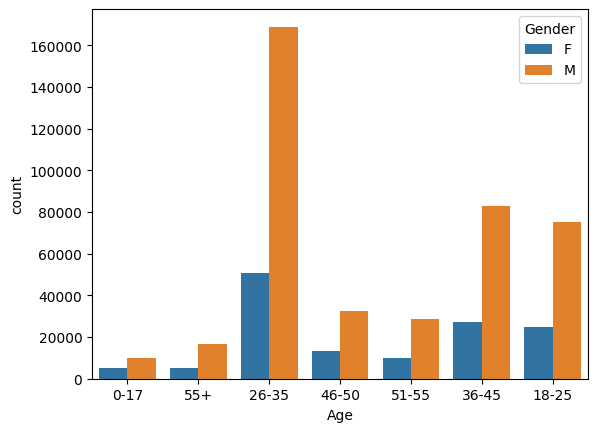

In [ ]:
sns.countplot(x=df['Age'], hue=df['Gender'])

In [ ]:
male_min_mean = np.mean(male_purchases) - 1.96 * np.std(male_purchases) / np.sqrt(iterations)
male_max_mean = np.mean(male_purchases) + 1.96 * np.std(male_purchases) / np.sqrt(iterations)
print(male_min_mean, male_max_mean)

9401.120275379757 9488.660924620244


In [ ]:
male_min = np.mean(male_purchases) - 1.96 * np.std(male_purchases)
male_max = np.mean(male_purchases) + 1.96 * np.std(male_purchases)
print(male_min, male_max)

8060.751402750846 10829.029797249155


In [ ]:
female_min_mean = np.mean(female_purchases) - 1.96 * np.std(female_purchases) / np.sqrt(iterations)
female_max_mean = np.mean(female_purchases) + 1.96 * np.std(female_purchases) / np.sqrt(iterations)
print(female_min_mean, female_max_mean)

8691.137423085964 8772.451976914037


In [ ]:
female_min = np.mean(female_purchases) - 1.96 * np.std(female_purchases)
female_max = np.mean(female_purchases) + 1.96 * np.std(female_purchases)
print(female_min, female_max)

7446.098714914649 10017.490685085351


In [ ]:
overlap = not (male_max_mean < female_min_mean or female_max_mean < male_min_mean)
overlap

False

In [ ]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
# Step 1: Group and count
df_counts = df.groupby(['Age', 'Gender']).size().reset_index(name='count')
df_pivot = df_counts.pivot(index='Age', columns='Gender', values='count').reset_index()
df_pivot.columns.name = None
print(df_pivot)

     Age      F       M
0   0-17   5083   10019
1  18-25  24628   75032
2  26-35  50752  168835
3  36-45  27170   82843
4  46-50  13199   32502
5  51-55   9894   28607
6    55+   5083   16421


In [ ]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [ ]:
df.groupby('Age')['Gender'].value_counts().reset_index()

,Age,Gender,count
0,0-17,M,10019
1,0-17,F,5083
2,18-25,M,75032
3,18-25,F,24628
4,26-35,M,168835
5,26-35,F,50752
6,36-45,M,82843
7,36-45,F,27170
8,46-50,M,32502
9,46-50,F,13199


In [ ]:
df.groupby('Marital_Status')['Gender'].value_counts()

Marital_Status  Gender
0               M         245910
                F          78821
1               M         168349
                F          56988
Name: count, dtype: int64

In [ ]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [ ]:
df['Age'].nunique()

7

In [ ]:
print(df['Age'].unique())

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [ ]:
print(sorted(df['Age'].unique()))

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


In [ ]:
df_married = df[df['Marital_Status']==1]
df_unmarried = df[df['Marital_Status']==0]

In [ ]:
df_married.shape

(225337, 10)

In [ ]:
df_unmarried.shape

(324731, 10)

In [ ]:
df.shape

(550068, 10)

In [ ]:
sample_size = 50
iterations = 1000
married_purchases = []
for i in range(iterations):
  married_purchases.append(df_married.sample(sample_size)['Purchase'].mean())

9219.81706


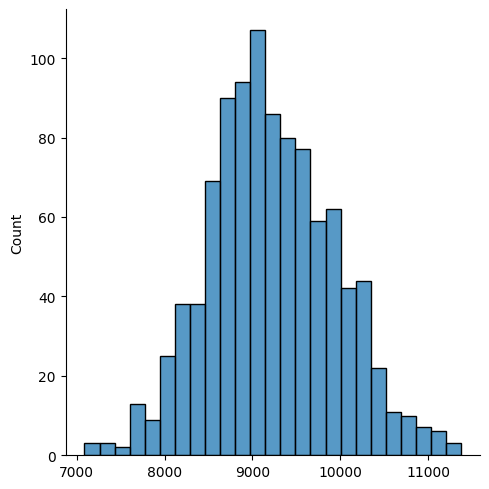

In [ ]:
print(np.mean(married_purchases))
sns.displot(x=married_purchases, bins=25)

In [ ]:
np.mean(df_unmarried['Purchase']).round(2)

np.float64(9265.91)

In [ ]:
sample_size = 50
iterations = 1000
unmarried_purchases = []
for i in range(iterations):
  unmarried_purchases.append(df_unmarried.sample(sample_size)['Purchase'].mean())

9286.41402


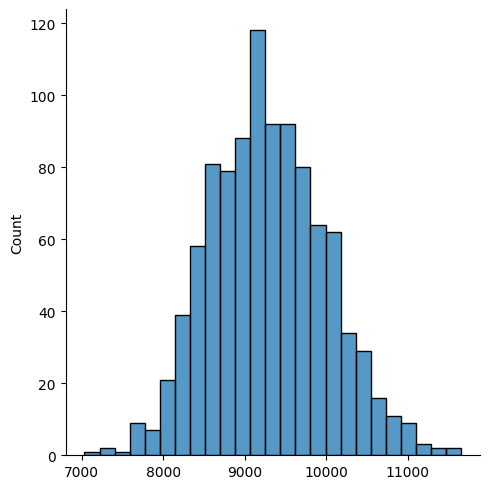

In [ ]:
print(np.mean(unmarried_purchases))
sns.displot(x=unmarried_purchases, bins=25)

In [ ]:
(df_married['Purchase']).sum()/len(df_married)

np.float64(9261.174574082374)

In [ ]:
(df_female['Purchase']).sum()/len(df_female)

np.float64(8734.565765155476)

<Axes: xlabel='Marital_Status', ylabel='count'>

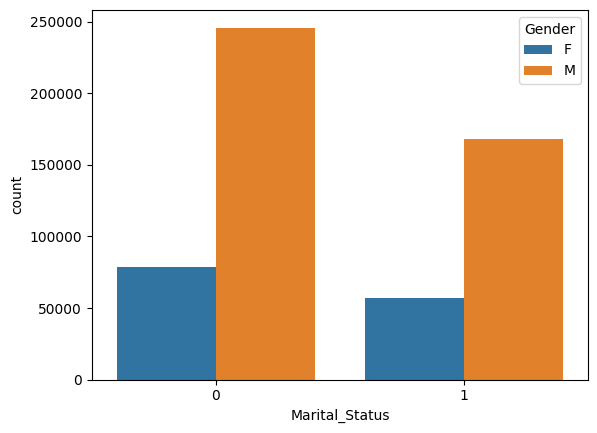

In [ ]:
sns.countplot(x=df['Marital_Status'], hue=df['Gender'])

<Axes: xlabel='Age', ylabel='count'>

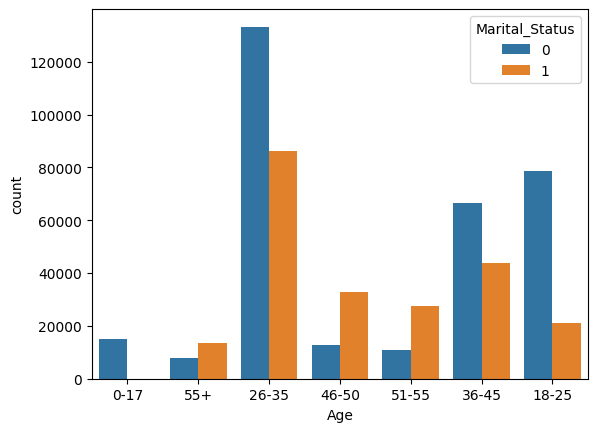

In [ ]:
sns.countplot(x=df['Age'], hue=df['Marital_Status'])

Calculating Confidence Intervals

In [ ]:
married_min_mean = np.mean(married_purchases) - 1.96 * np.std(married_purchases) / np.sqrt(iterations)
married_max_mean = np.mean(married_purchases) + 1.96 * np.std(married_purchases) / np.sqrt(iterations)
print(married_min_mean, married_max_mean)

9175.300803605485 9264.333316394514


In [ ]:
married_min = np.mean(married_purchases) - 1.96 * np.std(married_purchases)
married_max = np.mean(married_purchases) + 1.96 * np.std(married_purchases)
print(married_min, married_max)

7812.089428892973 10627.544691107025


In [ ]:
unmarried_min_mean = np.mean(unmarried_purchases) - 1.96 * np.std(unmarried_purchases) / np.sqrt(iterations)
unmarried_max_mean = np.mean(unmarried_purchases) + 1.96 * np.std(unmarried_purchases) / np.sqrt(iterations)
print(unmarried_min_mean, unmarried_max_mean)

9242.331631063895 9330.496408936106


In [ ]:
unmarried_min = np.mean(unmarried_purchases) - 1.96 * np.std(unmarried_purchases)
unmarried_max = np.mean(unmarried_purchases) + 1.96 * np.std(unmarried_purchases)
print(unmarried_min, unmarried_max)

7892.406482604998 10680.421557395002


In [ ]:
overlap_marital_status = not (married_max_mean < unmarried_min_mean or unmarried_max_mean < married_min_mean)
overlap_marital_status

True

<Axes: xlabel='Age', ylabel='Purchase'>

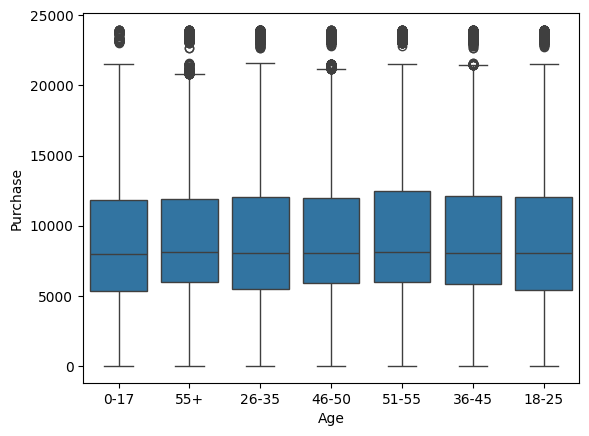

In [ ]:
import seaborn as sns
sns.boxplot(x='Age', y='Purchase', data=df)

<Axes: xlabel='Age', ylabel='Purchase'>

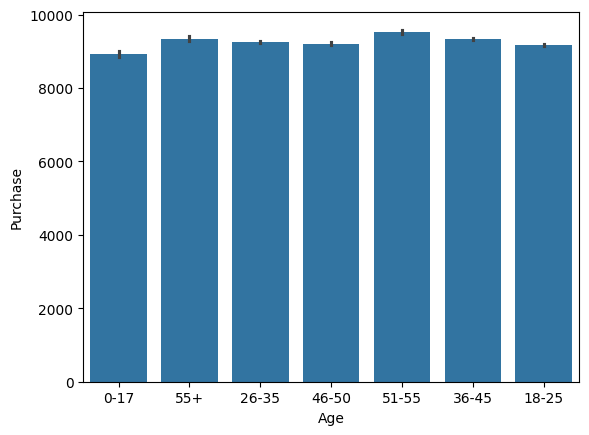

In [ ]:
sns.barplot(x='Age', y='Purchase', data=df, estimator=np.mean)

<Axes: xlabel='Age', ylabel='Purchase'>

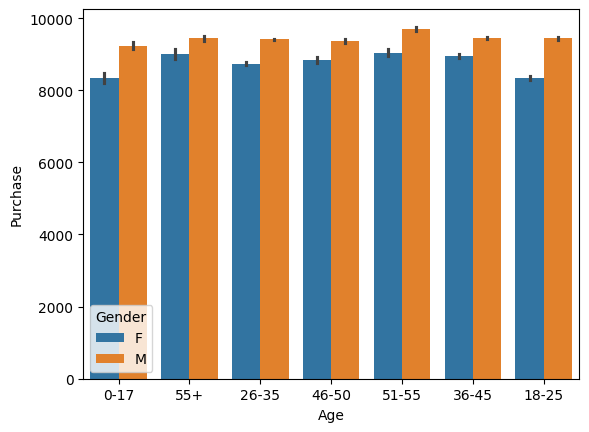

In [ ]:
sns.barplot(x='Age', y='Purchase', data=df, hue='Gender', estimator=np.mean)

<Axes: xlabel='Age', ylabel='Purchase'>

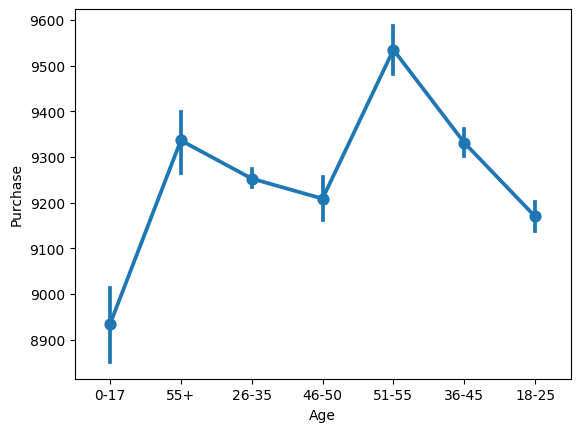

In [ ]:
sns.pointplot(x='Age', y='Purchase', data=df, estimator=np.mean, errorbar=('ci',95))

<Axes: xlabel='Age', ylabel='Purchase'>

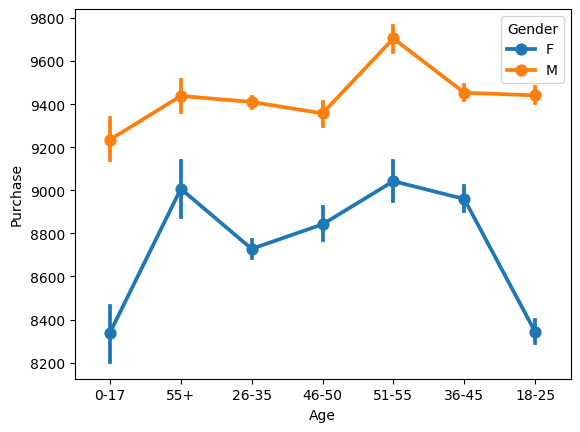

In [ ]:
sns.pointplot(x='Age', y='Purchase', hue='Gender', data=df, estimator=np.mean, errorbar=('ci',95))

In [ ]:
age_by_mean = df.groupby('Age')['Purchase'].mean().reset_index()
age_by_mean

,Age,Purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


In [ ]:
from scipy import stats
def get_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    margin = sem * stats.t.ppf((1 + confidence) / 2., n - 1)
    return mean, mean - margin, mean + margin

# Looping through each age group
age_groups = df['Age'].unique()

for age in age_groups:
    purchases = df[df['Age'] == age]['Purchase']
    mean, lower, upper = get_ci(purchases)
    print(f"Age group {age}: Mean = {mean:.2f}, 95% CI = [{lower:.2f}, {upper:.2f}]")


Age group 0-17: Mean = 8933.46, 95% CI = [8851.94, 9014.99]
Age group 55+: Mean = 9336.28, 95% CI = [9269.30, 9403.27]
Age group 26-35: Mean = 9252.69, 95% CI = [9231.73, 9273.65]
Age group 46-50: Mean = 9208.63, 95% CI = [9163.08, 9254.17]
Age group 51-55: Mean = 9534.81, 95% CI = [9483.99, 9585.63]
Age group 36-45: Mean = 9331.35, 95% CI = [9301.67, 9361.03]
Age group 18-25: Mean = 9169.66, 95% CI = [9138.41, 9200.92]


In [ ]:
#Storing CIs in a dictionary
ci_dict = {
    '0-17':    (8933.46, 8851.94, 9014.99),
    '18-25':   (9169.66, 9138.41, 9200.92),
    '26-35':   (9252.69, 9231.73, 9273.65),
    '36-45':   (9331.35, 9301.67, 9361.03),
    '46-50':   (9208.63, 9163.08, 9254.17),
    '51-55':   (9534.81, 9483.99, 9585.63),
    '55+':     (9336.28, 9269.30, 9403.27)
}
# Function to check overlap between two intervals
def intervals_overlap(ci1, ci2):
    return not (ci1[2] < ci2[1] or ci2[2] < ci1[1])

# Comparing all the pairs
ci_groups = list(ci_dict.keys())

for i in range(len(ci_groups)):
    for j in range(i + 1, len(ci_groups)):
        group1 = ci_groups[i]
        group2 = ci_groups[j]
        overlap = intervals_overlap(ci_dict[group1], ci_dict[group2])
        status = "OVERLAP" if overlap else "DO NOT OVERLAP"
        print(f"{group1} vs {group2}: {status}")


0-17 vs 18-25: DO NOT OVERLAP
0-17 vs 26-35: DO NOT OVERLAP
0-17 vs 36-45: DO NOT OVERLAP
0-17 vs 46-50: DO NOT OVERLAP
0-17 vs 51-55: DO NOT OVERLAP
0-17 vs 55+: DO NOT OVERLAP
18-25 vs 26-35: DO NOT OVERLAP
18-25 vs 36-45: DO NOT OVERLAP
18-25 vs 46-50: OVERLAP
18-25 vs 51-55: DO NOT OVERLAP
18-25 vs 55+: DO NOT OVERLAP
26-35 vs 36-45: DO NOT OVERLAP
26-35 vs 46-50: OVERLAP
26-35 vs 51-55: DO NOT OVERLAP
26-35 vs 55+: OVERLAP
36-45 vs 46-50: DO NOT OVERLAP
36-45 vs 51-55: DO NOT OVERLAP
36-45 vs 55+: OVERLAP
46-50 vs 51-55: DO NOT OVERLAP
46-50 vs 55+: DO NOT OVERLAP
51-55 vs 55+: DO NOT OVERLAP


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


<Axes: xlabel='Purchase'>

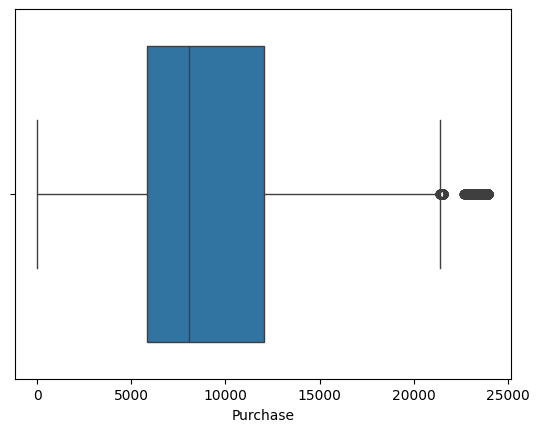

In [ ]:
sns.boxplot(x='Purchase', orient='h', data=df)

In [ ]:
def detect_outliers(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  IQR = q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

In [ ]:
outliers = detect_outliers(df['Purchase'])
print("No.of Outliers: "+ str(len(outliers)))
print("Maximum value in Outliers: "+ str(outliers.max()))
print("Minimum value of Outliers: "+ str(outliers.min()))

No.of Outliers: 2677
Maximum value in Outliers: 23961
Minimum value of Outliers: 21401


In [ ]:
df['Age'].value_counts(normalize=True) * 100

,proportion
Age,
26-35,39.919974
36-45,19.999891
18-25,18.117760
46-50,8.308246
51-55,6.999316
55+,3.909335
0-17,2.745479


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100

,proportion
Stay_In_Current_City_Years,
1,35.235825
2,18.513711
3,17.322404
4+,15.402823
0,13.525237


In [ ]:
df['Product_Category'].value_counts(normalize=True)*100

,proportion
Product_Category,
5,27.438971
1,25.520118
8,20.711076
11,4.415272
2,4.338373
6,3.720631
3,3.674637
4,2.136645
16,1.786688


In [ ]:
df[df['Gender']=='M']['Purchase'].mean()

np.float64(9437.526040472265)

In [ ]:
df[df['Gender']=='F']['Purchase'].mean()

np.float64(8734.565765155476)